In [1]:
import numpy as np
import astropy.units as u
import astropy.coordinates as coords
import astropy.time
import astropy.cosmology as cosmo
from astropy.visualization import astropy_mpl_style, quantity_support

import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

## Radio source
Ofek (2017) identified a sample of ~100 FIRST sources aligned with nearby galaxies and luminosities comparable to the persistent radio source at FRB 121102. 11 of these were not nuclear, so are less likely to be AGN. Chance of true association is high for most of the sample of 11 sources.

Ofek catalog: http://cdsarc.u-strasbg.fr/viz-bin/nph-Cat/html?J%2FApJ%2F846%2F44/table1.dat

## Optical counterpart

0.5" offset from z=0.01957 galaxy.

Image and spectrum from SDSS
http://skyserver.sdss.org/dr14/en/tools/quicklook/summary.aspx?ra=214.82854&dec=39.6768

TODO: add visualizations here

## VLASS

We are searching for VLASS counterparts to all of the Ofek catalog. About 2/3 or the Ofek catalog have VLASS coverage.

Five of the ten "interesting" sources, have VLASS coverage. Four of those VLASS images show a compact radio source at the location of the Ofek source. The flux of those VLASS 3 GHz sources is systematically less than that of FIRST, but consistent with a spectral index of -1 to -2.

One of the interesting sources with VLASS coverage, J141918.855+394036.03, has no detectable flux to a limit of roughly 100 microJy at 3 GHz.

In [2]:
t_first = 1994.631 # listed in catalog
t_nvss = 1995.4 # guess from archive
t_vlass = 2018.0 # guess from timestamp on file
s_first = 21.1 # millijansky
s_nvss = 18.5
s_vlass = 0.1 # # rough limit, TODO: calculate carefully
f_first = 1.4 # gigahertz
f_nvss = 1.4
f_vlass = 3.0

#### Spectral index limit

In [3]:
alpha_fv = np.log10(s_first/s_vlass)/np.log10(f_first/f_vlass)
alpha_nv = np.log10(s_nvss/s_vlass)/np.log10(f_nvss/f_vlass)
print(alpha_fv, alpha_nv)

-7.02214523315296 -6.849601737971776


TODO: add spectral index from comparison to TGSS http://tgssadr.strw.leidenuniv.nl/doku.php?id=spidx

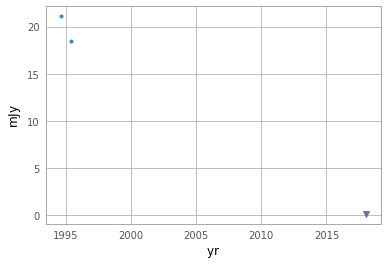

In [4]:
# TODO: add errors
with quantity_support():
    plt.plot([t_first, t_nvss]*u.year, [s_first, s_nvss]*u.milliJansky, '.')
    plt.plot([t_vlass]*u.year, [s_vlass]*u.milliJansky, 'v')

It's gone!

## Radio supernova modeling

In [5]:
def lc_fong(fp, t0, tdec, p=2.4):
    """ Decaying lightcurve as in Fong et al (2018).
    Short GRB from NS-NS merger.
    https://arxiv.org/pdf/1607.00416.pdf
    """

    timearr = np.linspace(t_first, t_vlass, 100)
    fluxarr = np.zeros_like(timearr)

    # early evolution
    t1 = np.where(timearr-t0 < tdec)
    fluxarr[t1] = fp*((timearr[t1]-t0)/tdec)**3

    # late evolution
    t2 = np.where(timearr-t0 >= tdec)
    fluxarr[t2] = fp*((timearr[t2]-t0)/tdec)**-((15*p-21)/10)

    return timearr, fluxarr

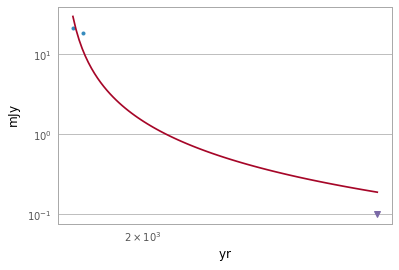

In [6]:
# TODO: add spectral index correction

with quantity_support():
    plt.plot([t_first, t_nvss]*u.year, [s_first, s_nvss]*u.milliJansky, '.')
    plt.plot([t_vlass]*u.year, [s_vlass]*u.milliJansky, 'v')

    times, fluxes = lc_fong(s_first*3, 1993.8, 0.5)
    plt.plot(times*u.year, fluxes*u.millijansky)
    plt.loglog()

#### It is really luminous

In [7]:
co = cosmo.Planck15
d_lum = co.luminosity_distance(0.01957)
lum = (s_first*1e-3)*1e-23 * 4*np.pi*d_lum.to_value(u.cm)**2
nulnu = lum*f_first*1e9

In [8]:
print("*Minimum* radio luminosity: L={0} erg/s/Hz, nuLnu = {1} erg/s".format(lum, nulnu))

*Minimum* radio luminosity: L=1.9507261551882188e+29 erg/s/Hz, nuLnu = 2.7310166172635063e+38 erg/s


Compare to Kamble et al (2014), on VLASS discovery of radio supernovae.
<img src="kamble.png" width=800>

Compare to Metzger et al (2018), on rates and lightcurves or radio transients.
<img src="metzger.png" width=800>

#### Luminosity and time scale consistent with off-axis LGRB!

## Next steps

* Lightcurve modeling with spectral dependence
* Include models for other kinds of afterglows (or more general model?)
* Constrain L vs dt space to classify on Metzger plot (see above)

## Other resources

TGSS: http://tgssadr.strw.leidenuniv.nl/doku.php?id=spidx

## References

Brunthaler et al radio discovery of SN in M82: https://arxiv.org/pdf/0904.2388.pdf
Metzger, Williams and Berger on rates and lightcurves of radio transients: https://arxiv.org/pdf/1502.01350.pdf
Fong et al on sGRB radio afterglows: https://arxiv.org/pdf/1502.01350.pdf